In [10]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [11]:
# Load Data
fandango = pd.read_csv('fandango_scrape.csv')
sites = pd.read_csv('all_sites_scores.csv')


In [12]:
# Merge
merged = pd.merge(fandango, sites, on='FILM')
merged.dropna(inplace=True)
merged.head()

,FILM,STARS,RATING,VOTES,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Fifty Shades of Grey (2015),4.0,3.9,34846,25,42,46,3.2,4.2,778,179506
1,Jurassic World (2015),4.5,4.5,34390,71,81,59,7.0,7.3,1281,241807
2,American Sniper (2015),5.0,4.8,34085,72,85,72,6.6,7.4,850,251856
3,Furious 7 (2015),5.0,4.8,33538,81,84,67,6.8,7.4,764,207211
4,Inside Out (2015),4.5,4.5,15749,98,90,94,8.9,8.6,807,96252


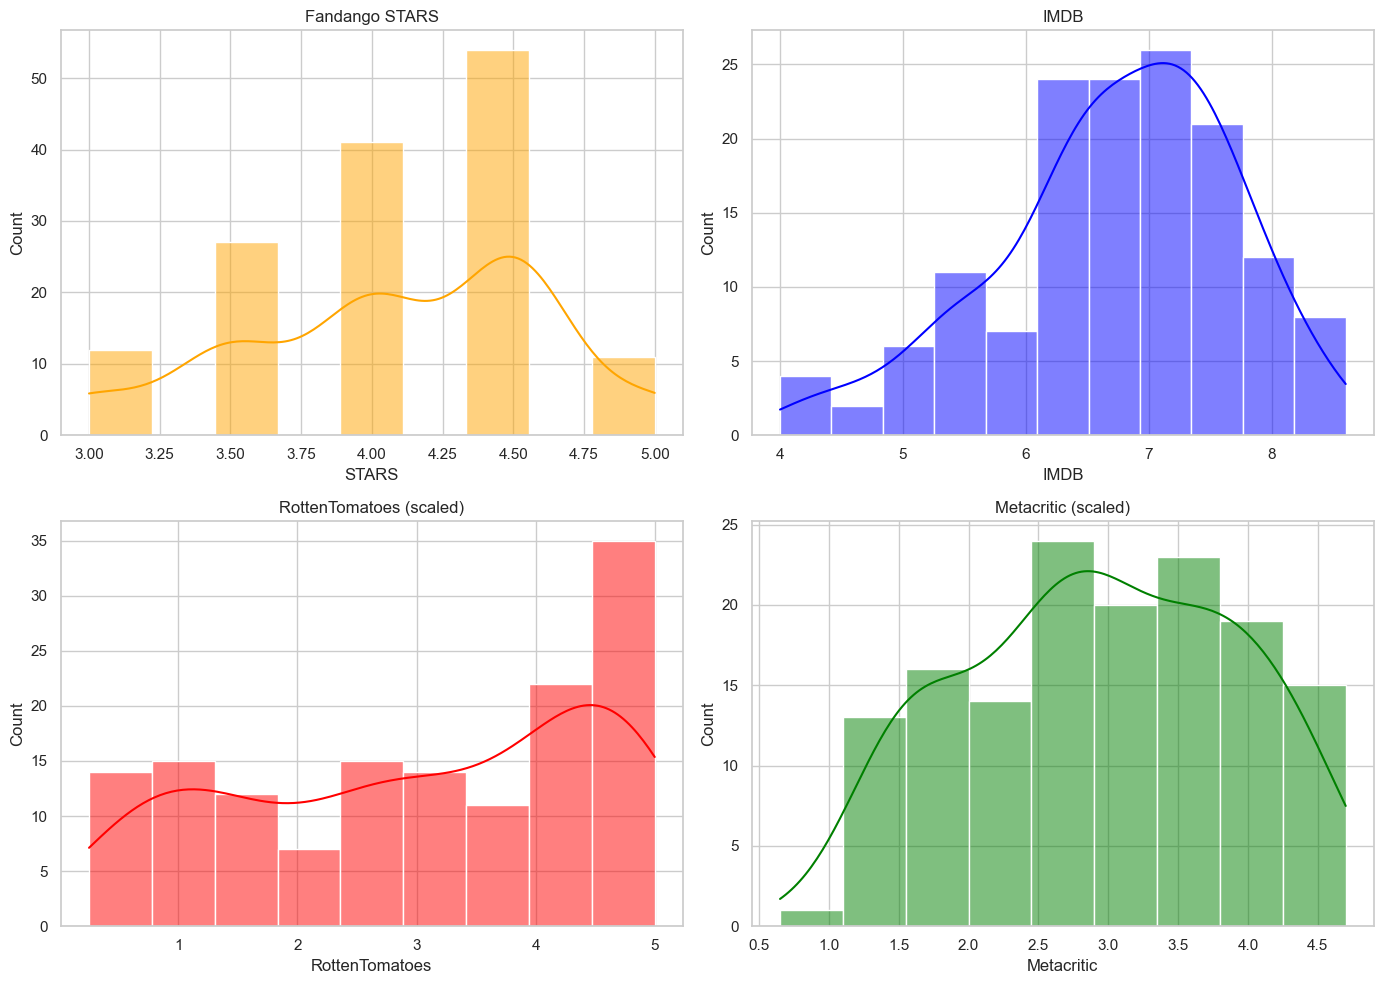

In [13]:
# Rating Histograms
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.histplot(merged['STARS'], ax=axes[0,0], color='orange', kde=True)
sns.histplot(merged['IMDB'], ax=axes[0,1], color='blue', kde=True)
sns.histplot(merged['RottenTomatoes']/20, ax=axes[1,0], color='red', kde=True)
sns.histplot(merged['Metacritic']/20, ax=axes[1,1], color='green', kde=True)
axes[0,0].set_title('Fandango STARS')
axes[0,1].set_title('IMDB')
axes[1,0].set_title('RottenTomatoes (scaled)')
axes[1,1].set_title('Metacritic (scaled)')
plt.tight_layout()

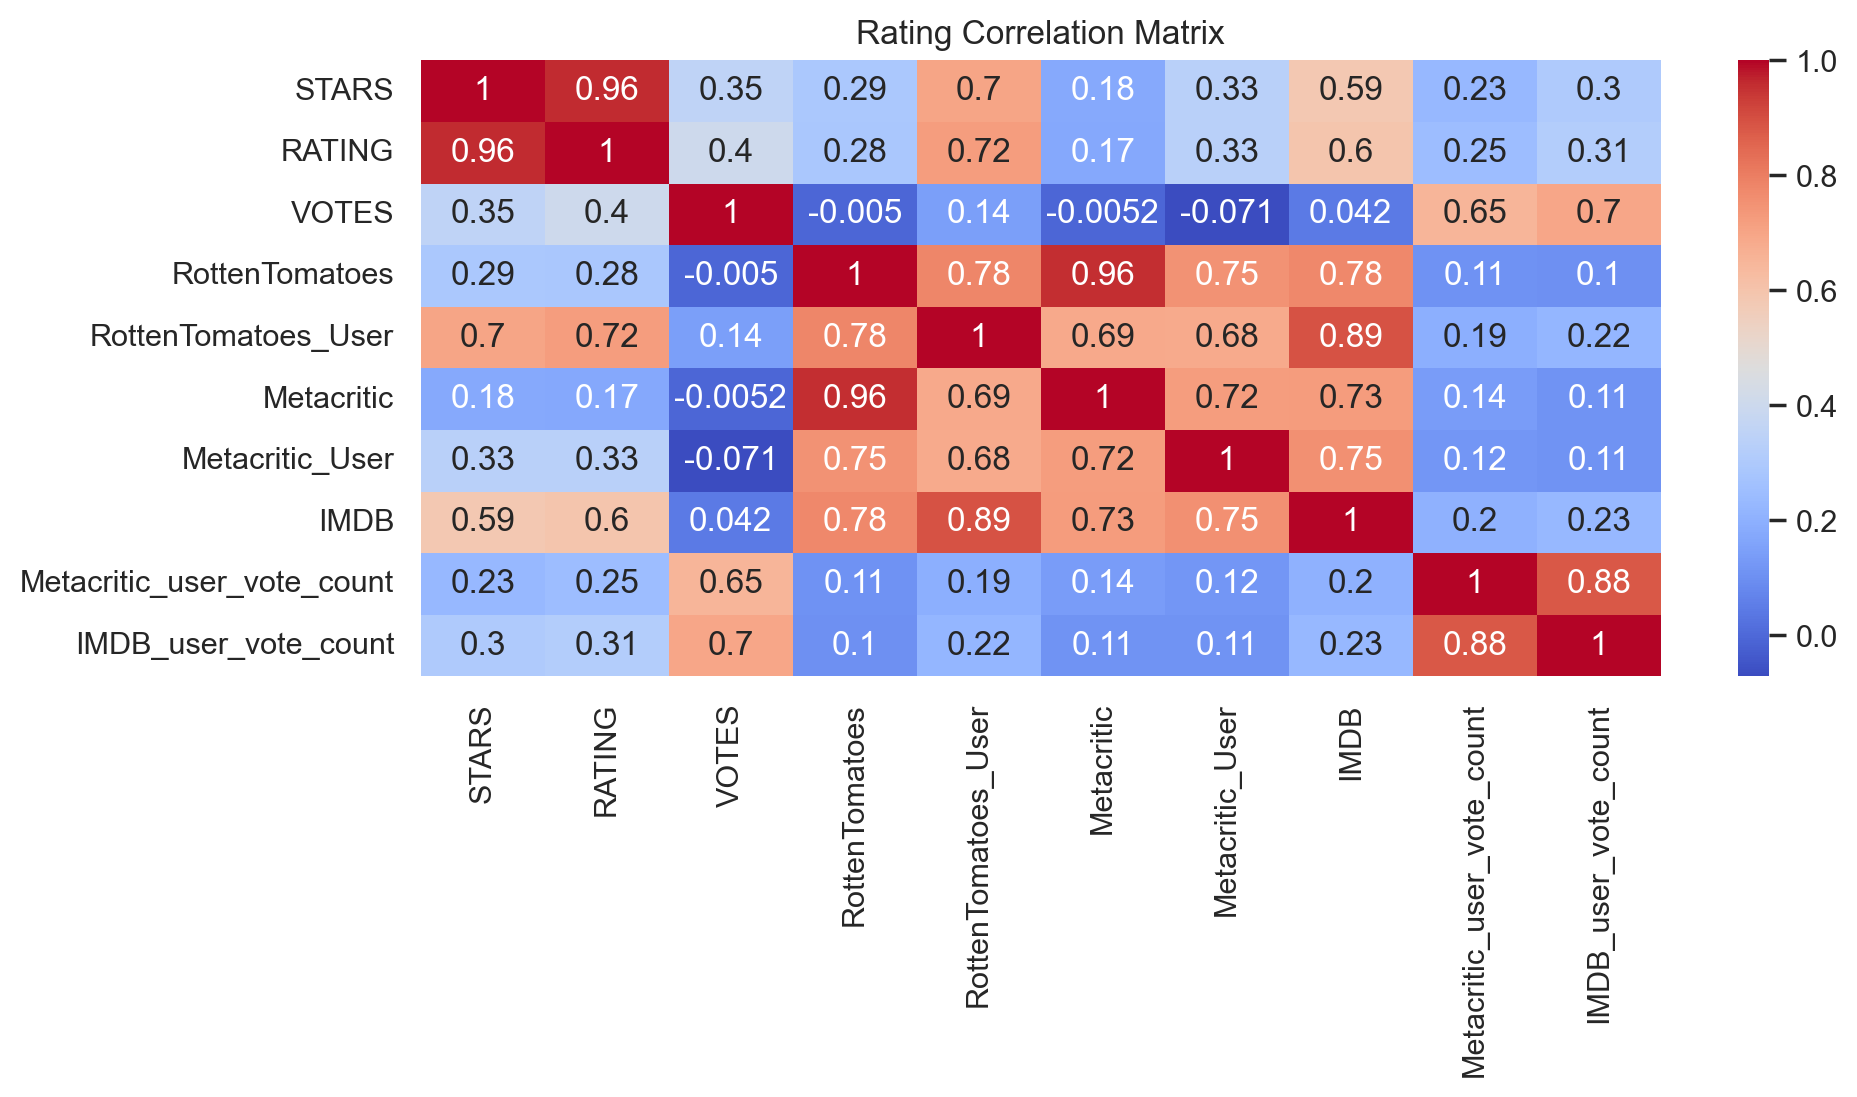

In [14]:
# Correlation Matrix
plt.figure(figsize=(10,4),dpi=200)
sns.heatmap(merged.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Rating Correlation Matrix')
plt.show()